In [107]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def load_json_file(file_path):
    try:
        with open(file_path, "r") as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return None


data = load_json_file("data/20241211_095241.json")

In [109]:
len(data)

3

In [110]:
data[0].keys()

dict_keys(['GameID', 'GamemodeName', 'ExitedEarly', 'Duration', 'PressData', 'HeartrateData'])

In [111]:
for item in data:
    print(item["GamemodeName"])

Accumulator Mode
Accumulator Mode
Sequence Mode


# Accumulator mode

In [112]:
am_data = data[0]

In [113]:
am_data.keys()

dict_keys(['GameID', 'GamemodeName', 'ExitedEarly', 'Duration', 'PressData', 'HeartrateData'])

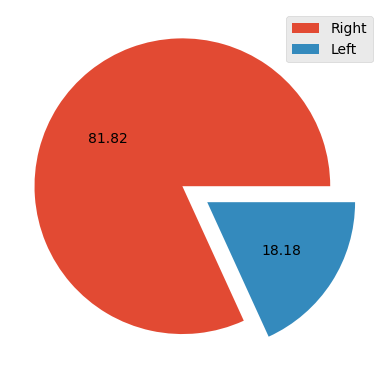

In [114]:
from collections import Counter

hand_used = [item["HandUsed"] for item in am_data["PressData"]]
hand_used_counter = Counter(hand_used)

plt.style.use("ggplot")
plt.pie(hand_used_counter.values(), autopct = "%.2f", 
        explode = [.1, .1])
plt.legend(labels = ["Right", "Left"], bbox_to_anchor = (1,1))
plt.show()

# Button press

In [115]:
target_hit_hand = [item["HandUsed"] for item in am_data["PressData"]]
target_hit_data = [item["ControllerTrajectory"][-1]["position"] for item in am_data["PressData"]]

target_hit_data_right = []
target_hit_data_left = []

for hand, point in zip(target_hit_hand, target_hit_data):
    if hand == "right":
        target_hit_data_right.append(point)
    elif hand == "left":
        target_hit_data_left.append(point)


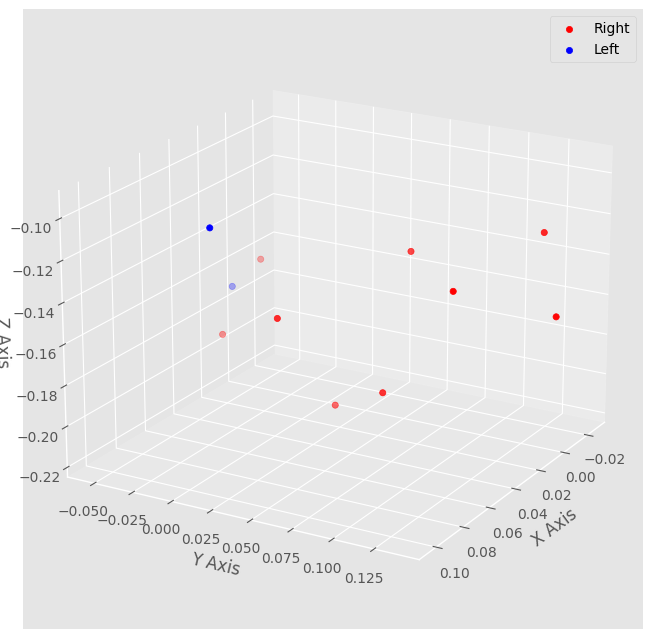

In [181]:
colours = ["red", "blue"]
labels = ["Right", "Left"]

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(projection="3d")

for hit_data in [target_hit_data_right, target_hit_data_left]:
    x = [point["x"] for point in hit_data]
    y = [point["y"] for point in hit_data]
    z = [point["z"] for point in hit_data]

    ax.scatter(x, y, z, c=colours.pop(0), marker="o", label=labels.pop(0))

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

# Adjust the camera angle
ax.view_init(elev=20, azim=30)

plt.legend()
plt.show()


# Reflex time

In [148]:
target = [(item["ReactionTime"], item["HandUsed"], item["CorrectPress"]) for item in data[0]["PressData"]]
all_reaction_times = [item[0] for item in target]
right_hand_reaction = [item[0] for item in target if item[1] == "right"]
left_hand_reaction = [item[0] for item in target if item[1] == "left"]

In [168]:
target

[(2.841949462890625, 'right', True),
 (3.509033203125, 'right', True),
 (1.4332275390625, 'right', True),
 (1.434783935546875, 'left', True),
 (0.946319580078125, 'right', True),
 (2.269073486328125, 'right', True),
 (7.824310302734375, 'right', False),
 (14.702056884765625, 'left', True),
 (1.2947998046875, 'right', False),
 (4.455902099609375, 'right', True),
 (7.031005859375, 'right', True)]

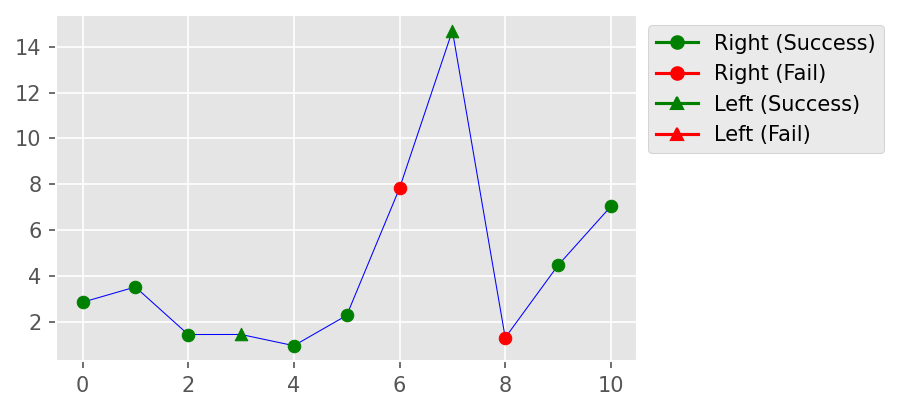

In [179]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.figure(figsize=(5, 3), dpi=150)

x_scatter = list(range(0, 11))

# line
plt.plot(all_reaction_times, c="blue", linewidth=0.5, zorder=1)

# scatter
for item, x, y in zip(target, x_scatter, all_reaction_times):
    marker = "o" if item[1] == "right" else "^"
    colour = "green" if item[2] else "red"
    plt.scatter(x, y, c=colour, marker=marker, zorder=2)

# legends
legend_elements = [
    mlines.Line2D([], [], color='green', marker='o', linestyle='-', label='Right (Success)'),
    mlines.Line2D([], [], color='red', marker='o', linestyle='-', label='Right (Fail)'),
    mlines.Line2D([], [], color='green', marker='^', linestyle='-', label='Left (Success)'),
    mlines.Line2D([], [], color='red', marker='^', linestyle='-', label='Left (Fail)')
]

plt.legend(handles=legend_elements, bbox_to_anchor = (1, 1))

plt.show()
